## <center> Capstone Project 1</center> ##
### <center> Vikram Lucky


# [ Airbnb New User Bookings:](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings)

### <font color =red>Problem Question: Where will new guest book their first trip?</font>
#### *“New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.”-Airbnb-Kaggle* ####
### Type: Multiclass Classification Problem
### Source: Kaggle Competition
### Data: Contains 5 .csv files

In [366]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
%matplotlib inline
style.use('fivethirtyeight')
df = pd.read_csv('./train_users_2.csv')
countries = pd.read_csv('./countries.csv')
sessions = pd.read_csv('./sessions.csv')
age_gender_bkts = pd.read_csv('./age_gender_bkts.csv')

#### Data Wrangling - Training data

In [367]:
print("Shape of Traning dataset: ", df.shape)
df.head(2)

Shape of Traning dataset:  (213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF


In [368]:
df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


Description of traning data, we already see some irregular values for example max age = 2014 as well as many missing values in age column. Lets check total number of missing value in our traininig data. As we have only 16 columns, I think it's better to inspect them one by one.

In [369]:
#The function check_null takes input as dataframe, and prints out number of missing values if there's any, and head of series.
def check_null(dataframe):
    column_name = dataframe.columns
    for _ in column_name:
        print("Column ", _)
        print("There are ",dataframe[_].isnull().sum()," missing values in ",_)
        print(dataframe[_].value_counts(dropna = False).head(3))
        print("____________________________________________________________")


In [370]:
check_null(df)

Column  id
There are  0  missing values in  id
6r6mujq6qz    1
0hwo4jvryx    1
uf7d9d045w    1
Name: id, dtype: int64
____________________________________________________________
Column  date_account_created
There are  0  missing values in  date_account_created
2014-05-13    674
2014-06-24    670
2014-06-25    636
Name: date_account_created, dtype: int64
____________________________________________________________
Column  timestamp_first_active
There are  0  missing values in  timestamp_first_active
20131002011351    1
20130622024754    1
20111120235256    1
Name: timestamp_first_active, dtype: int64
____________________________________________________________
Column  date_first_booking
There are  124543  missing values in  date_first_booking
NaN           124543
2014-05-22       248
2014-06-11       231
Name: date_first_booking, dtype: int64
____________________________________________________________
Column  gender
There are  0  missing values in  gender
-unknown-    95688
FEMALE    

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


Before we impute missing values, we will convert df['Date_Account_Created', 'timestamp_first_active'] columns to datetime object columns.

In [372]:
df['date_account_created'] =  pd.to_datetime(df['date_account_created'], format='%Y-%m-%d')

In [373]:
df.date_account_created.dtype

dtype('<M8[ns]')

In [374]:
df['timestamp_first_active'] =  pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [375]:
df['timestamp_first_active'].dtype

dtype('<M8[ns]')

In [376]:
df.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF


The first column with missing values we have is date_first_booking. Let's inspect it.

In [377]:
df.date_first_booking.value_counts(dropna=False).head()/len(df)

NaN           0.583473
2014-05-22    0.001162
2014-06-11    0.001082
2014-06-24    0.001059
2014-05-21    0.001054
Name: date_first_booking, dtype: float64

58% of the data in date_first_booking column is missing, Data first booking columns contains the date of users first booking. 58% is a big chunk, I think it's better to remove this column entirely.

In [378]:
df.drop('date_first_booking', inplace = True, axis = 1)
print(df.shape)

(213451, 15)


In [379]:
print(df['age'].value_counts(dropna= False).head()/len(df))
print(df['gender'].value_counts(dropna= False).head()/len(df))

NaN      0.412226
 30.0    0.028690
 31.0    0.028184
 29.0    0.027936
 28.0    0.027824
Name: age, dtype: float64
-unknown-    0.448290
FEMALE       0.295342
MALE         0.255047
OTHER        0.001321
Name: gender, dtype: float64


Age and Gender columns have some missing values, I think these columns are very robust we will have to fill up these NaN values with some sensible data.


### Age Column

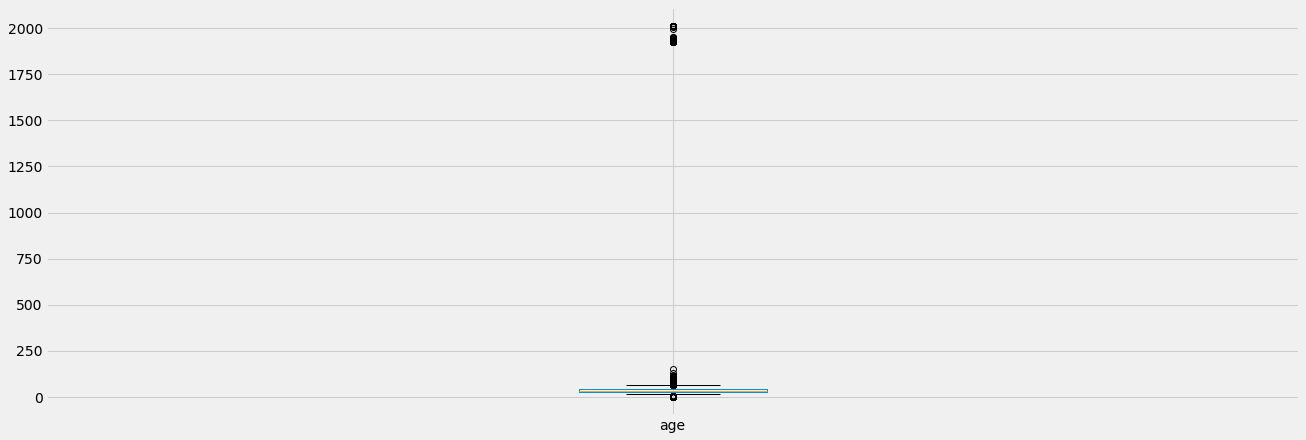

In [380]:
df.boxplot(column='age', figsize = (20,7));


Age column needs some work, So many irregular values. Values below 18 (accoring to Airbnb policy you have to be at least 18 years old to book a trip), where max age is not specified, so i am going to assume 90 as max value

In [381]:
print("Ages above 90 in age columns ", df[df['age'] > 90].age.value_counts(dropna=True).sum())
print("Ages Below 18 in age columns ", df[df['age']<18].age.value_counts(dropna= True).sum())

Ages above 90 in age columns  2543
Ages Below 18 in age columns  158


In [382]:
# Below we will replace value above 90 and below 18 with np.nan, and then np.nan with mean values
df.loc[df['age'] > 90, 'age'] = np.nan
df.loc[df['age'] < 18, 'age'] = np.nan
df.age.value_counts(dropna =False).head()/len(df)

NaN      0.424880
 30.0    0.028690
 31.0    0.028184
 29.0    0.027936
 28.0    0.027824
Name: age, dtype: float64

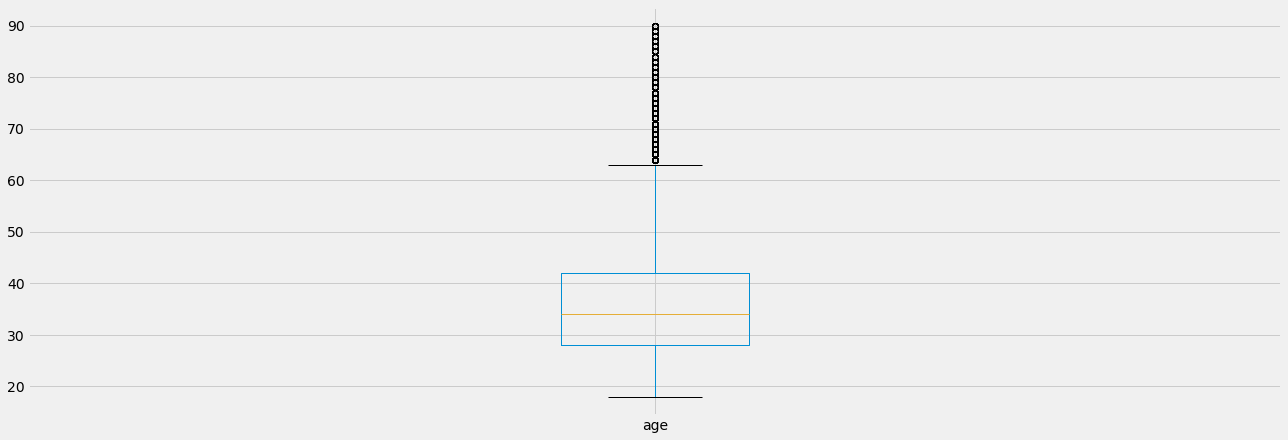

In [383]:
df.boxplot(column='age', figsize = (20,7));

In [384]:
mean_age = np.mean(df['age'])
print("Mean age ",mean_age)
df['age'] = df['age'].fillna(mean_age)

Mean age  36.480164548712935


In [385]:
df.age.value_counts(dropna =False).head()/len(df)

36.480165    0.424880
30.000000    0.028690
31.000000    0.028184
29.000000    0.027936
28.000000    0.027824
Name: age, dtype: float64

In [386]:
df.age = df.age.astype(int)

In [387]:
df.age.head()

0    36
1    38
2    56
3    42
4    41
Name: age, dtype: int64

### Gender column

Text(0.5,1,'Gender Columns')

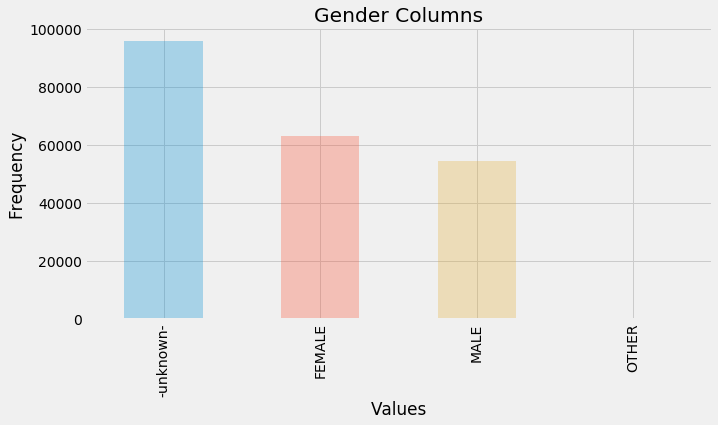

In [388]:
df.gender.value_counts(dropna=False).plot(kind='bar',alpha=.30, figsize = (10, 5));
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Gender Columns')

In [389]:
def recode_sex(sex_value):
    if sex_value == 'MALE':
        return 'M'
    elif sex_value == 'FEMALE':
        return 'F'
    else:
        return "Unknw"
df['gender'] = df.gender.apply(recode_sex)    

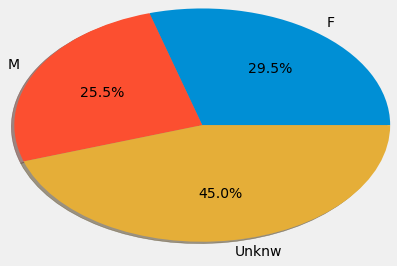

In [390]:
labels = df['gender'].astype('category').cat.categories.tolist()
counts = df['gender'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, radius=1.25) 
plt.show()

In [391]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,Unknw,36,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,M,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,F,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,F,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,Unknw,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Signup Method


In [392]:
df.signup_method.value_counts(dropna=False)

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

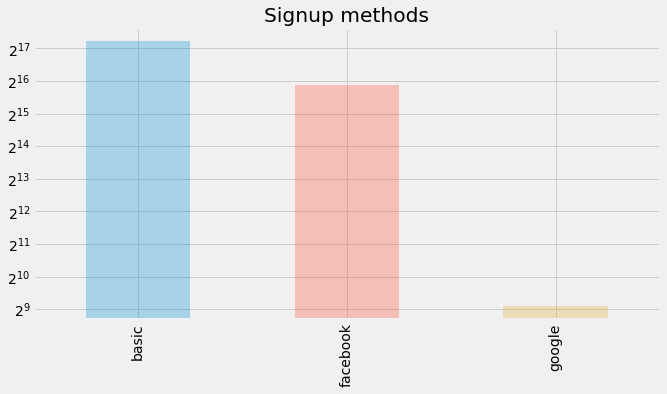

In [393]:
df.signup_method.value_counts(dropna=False).plot(kind = "bar",alpha=.30, figsize = (10, 5))
plt.yscale('log',basey=2)
plt.title('Signup methods');

We can leave this Column alone for now, as Nothing is missing. Later in the Feature Engineering we convert this column to categorical column and we will drop one of the values present.

### Signup_Flow 

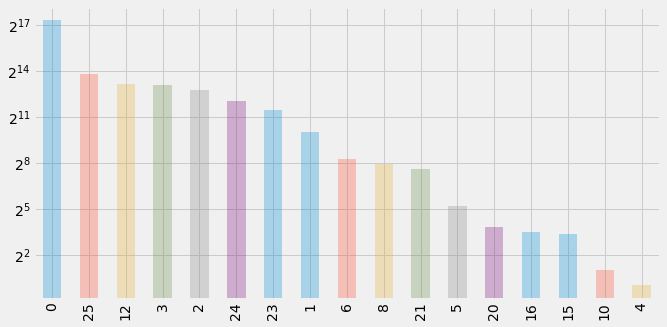

In [394]:
df.signup_flow.value_counts(dropna = False).plot(kind = "bar",alpha=.30, figsize = (10, 5))
plt.yscale('log',basey=2)

### Language

In [395]:
df.language.value_counts(dropna = False)

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

The Language column contains language codes, I am not familiar with some of the codes. So, i will find .csv file containing codes with respective language and will covert these codes to full language names for now.

In [396]:
language_codes = pd.read_csv('./language_codes.csv')
#This file from https://datahub.io/core/language-codes#resource-language-codes

In [397]:
language_codes.head(2)

,alpha2,English
0,aa,Afar
1,ab,Abkhazian


In [398]:
keys = language_codes['alpha2'].tolist()
values = language_codes['English'].tolist()
language_code = dict(zip(keys, values))

In [399]:
def lang_func(code):
    return language_code[code]

In [400]:
df['language'] = df.language.apply(lang_func)    

In [401]:
df['language'].value_counts()

English                  206314
Chinese                    1632
French                     1172
Spanish; Castilian          915
Korean                      747
German                      732
Italian                     514
Russian                     389
Portuguese                  240
Japanese                    225
Swedish                     122
Dutch; Flemish               97
Turkish                      64
Danish                       58
Polish                       54
Czech                        32
Norwegian                    30
Greek, Modern (1453-)        24
Thai                         24
Indonesian                   22
Hungarian                    18
Finnish                      14
Icelandic                     5
Catalan; Valencian            5
Croatian                      2
Name: language, dtype: int64

Much betterm to read!

### Affiliate channel

In [402]:
df.affiliate_channel.value_counts(dropna = False)

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

### Affiliate Provider

In [403]:
df.affiliate_provider.value_counts(dropna= False)

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

### First Affiliate Tracked

In [404]:
df.first_affiliate_tracked.value_counts(dropna = False)/len(df)

untracked        0.511743
linked           0.216851
omg              0.206052
tracked-other    0.028840
NaN              0.028414
product          0.007290
marketing        0.000651
local ops        0.000159
Name: first_affiliate_tracked, dtype: float64

In [405]:
# About 28% of the data is missing, for now we will just replace it with 'Unknown'

In [406]:
df['first_affiliate_tracked'] = df['first_affiliate_tracked'].fillna('Unknown')

In [407]:
df.first_affiliate_tracked.value_counts(dropna = False)/len(df)

untracked        0.511743
linked           0.216851
omg              0.206052
tracked-other    0.028840
Unknown          0.028414
product          0.007290
marketing        0.000651
local ops        0.000159
Name: first_affiliate_tracked, dtype: float64

### signup_app

In [408]:
df.signup_app.value_counts(dropna =False)/len(df)

Web        0.856014
iOS        0.089102
Moweb      0.029332
Android    0.025552
Name: signup_app, dtype: float64

### Frist device type & First Browser

In [409]:
df.first_device_type.value_counts(dropna =False)

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [410]:
print(df.first_browser.isnull().any())
print(df.first_browser.value_counts(dropna=False).head(5))

False
Chrome       63845
Safari       45169
Firefox      33655
-unknown-    27266
IE           21068
Name: first_browser, dtype: int64


Above two columns looks good as it is for now.

### Country Destination

In [411]:
df.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

In [412]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,Unknw,36,facebook,0,English,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,M,38,facebook,0,English,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,F,56,basic,3,English,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,F,42,facebook,0,English,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,Unknw,41,basic,0,English,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [416]:
df.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
gender                     False
age                        False
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked    False
signup_app                 False
first_device_type          False
first_browser              False
country_destination        False
dtype: bool

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 15 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
gender                     213451 non-null object
age                        213451 non-null int64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    213451 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: datetime64[ns](2), int64(2), object(11)
memory usage: 24.4+ MB


In [419]:
df.shape

(213451, 15)

Our main train.csv df looks good, each columns is in expected dtype. And no missing values. lets explore other .csv files

### Sessions.csv  contains  information about web sessions log for users
##### user_id to be joined with used_id in traning df. 

In [420]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [426]:
sessions.shape

(10567737, 6)

In [427]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [428]:
sessions.isnull().any()

user_id           True
action            True
action_type       True
action_detail     True
device_type      False
secs_elapsed      True
dtype: bool

In [432]:
#We see some missing values in user_id, we are going to drop rows where user_id is np.NaN
sessions.dropna(subset=['user_id'], inplace =True)

In [434]:
sessions.shape

(10533241, 6)

About 34496 rows contained missing user_id and all have been removed.

In [436]:
sessions.isnull().any()

user_id          False
action            True
action_type       True
action_detail     True
device_type      False
secs_elapsed      True
dtype: bool

As this is not our Traning dateset, we will leave this out for now until we get to ML part, if required we might extract some information from sessions dataframe. But for now we will exclude it.

### Feature Engineering

### Gender Columns

In [20]:
df = pd.get_dummies(df, columns = ['gender'], prefix = ['Sex'], drop_first=True)
#The basic strategy is to convert each category value into a new column
#and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.
#We have 3 possible values for gender, we dropped one of them becuase two capture all the information about that column.
#which will avoid multicollinearity

In [21]:
df.head(2)

,id,date_account_created,timestamp_first_active,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Sex_1,Sex_Unknw
0,gxn3p5htnn,2010-06-28,20090319043255,36,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,1
1,820tgsjxq7,2011-05-25,20090523174809,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,1,0


### Signup Method

In [22]:
df.signup_method.value_counts(dropna=False)

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

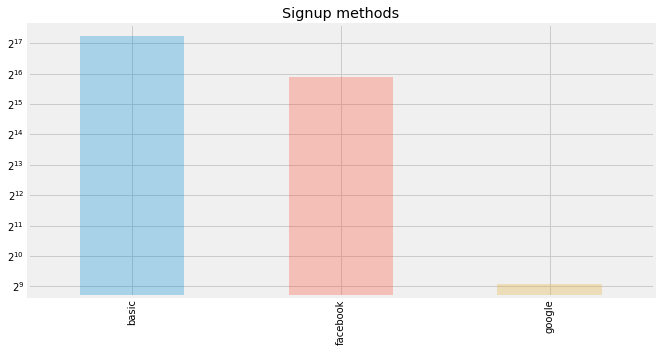

In [23]:
df.signup_method.value_counts(dropna=False).plot(kind = "bar",alpha=.30, figsize = (10, 5))
plt.yscale('log',basey=2)
plt.title('Signup methods');

In [24]:
df = pd.get_dummies(df, columns = ['signup_method'], prefix = ['signup_method'])

In [25]:
df.drop('signup_method_google', inplace=True, axis = 1)
df.head(3)

,id,date_account_created,timestamp_first_active,age,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Sex_1,Sex_Unknw,signup_method_basic,signup_method_facebook
0,gxn3p5htnn,2010-06-28,20090319043255,36,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,1,0,1
1,820tgsjxq7,2011-05-25,20090523174809,38,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,1,0,0,1
2,4ft3gnwmtx,2010-09-28,20090609231247,56,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,0,0,1,0


### Signup_Flow 

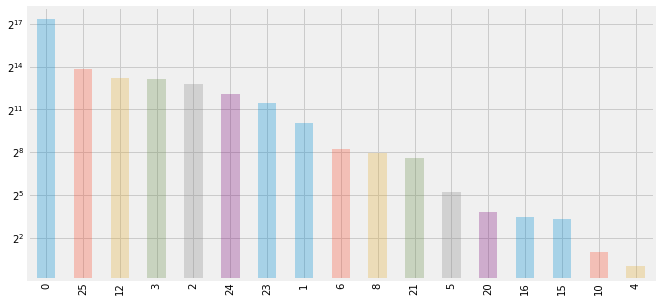

In [30]:
df.signup_flow.value_counts(dropna = False).plot(kind = "bar",alpha=.30, figsize = (10, 5))
plt.yscale('log',basey=2)